In [1]:
!pip install diffusers transformers torch Pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 95.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_img2img.StableDiffusionImg2ImgPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/75 [00:00<?, ?it/s]

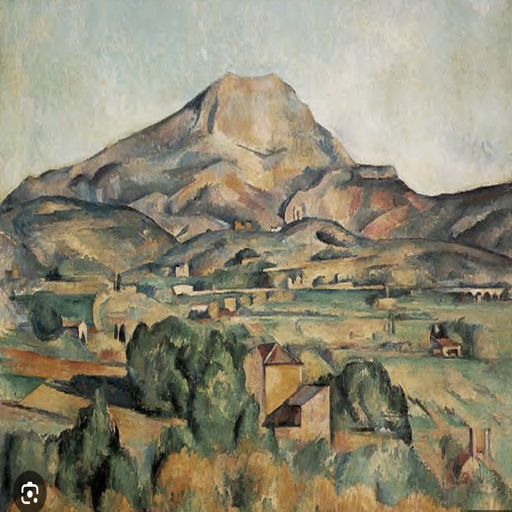

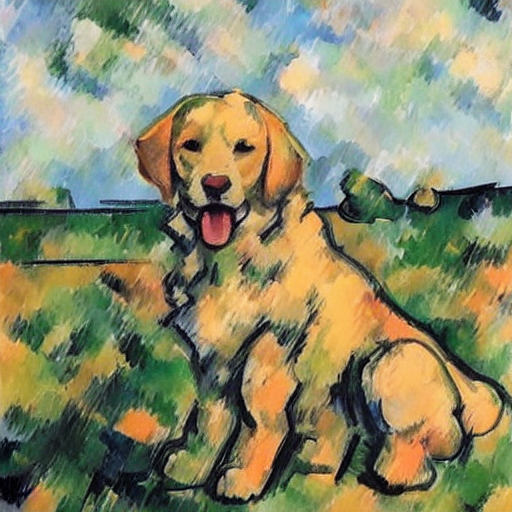

'\nAdditional parameters you can experiment with:\n\n1. strength (float, 0-1):\n   - Controls how much to transform the reference image\n   - Lower values preserve more of the original image\n   - Higher values allow more variation\n\n2. guidance_scale (float, usually 1-20):\n   - Controls how closely the image follows the prompt\n   - Higher values = more prompt adherence\n   - Lower values = more creative freedom\n\n3. num_inference_steps (int):\n   - More steps = potentially better quality but slower\n   - Typical values: 30-100\n\n4. negative_prompt (str):\n   - Specify what you don\'t want in the image\n   - Example: "blurry, bad quality, distorted"\n\nExample usage with these parameters:\n\nresult = pipe(\n    prompt=prompt,\n    image=init_image,\n    strength=0.65,\n    guidance_scale=5,\n    num_inference_steps=75,\n    negative_prompt="blurry, bad quality"\n).images[0]\n'

In [22]:
# Basic Image-to-Image using Stable Diffusion
import torch
from diffusers import StableDiffusionImg2ImgPipeline
from PIL import Image
import requests
from io import BytesIO

def load_image(image_path):
    """
    Load an image from a file path or URL
    """
    if image_path.startswith('http'):
        response = requests.get(image_path)
        image = Image.open(BytesIO(response.content))
    else:
        image = Image.open(image_path)
    return image

# Initialize the pipeline
# Note: You'll need to accept the model terms of use and have a HuggingFace token
model_id = "stable-diffusion-v1-5/stable-diffusion-v1-5"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    safety_checker=None  # Optional: disable safety checker if needed
)

# If you have a GPU, move the model to it
if torch.cuda.is_available():
    pipe = pipe.to("cuda")

# Load your initial image
# Replace with your image path or URL
init_image = load_image("cezanne.png")

# Ensure image is in RGB mode
init_image = init_image.convert("RGB")

# Resize the image to be compatible with Stable Diffusion (must be divisible by 8)
init_image = init_image.resize((512, 512))

# Set your prompt
prompt = "Golden Retriever in a Cezanne-style"


"""
Additional parameters for the image generation:

1. strength (float, 0-1):
   - Controls how much to transform the reference image
   - Lower values preserve more of the original image
   - Higher values allow more variation

2. guidance_scale (float, usually 1-20):
   - Controls how closely the image follows the prompt
   - Higher values = more prompt adherence
   - Lower values = more creative freedom

3. num_inference_steps (int):
   - More steps = potentially better quality but slower
   - Typical values: 30-100

4. negative_prompt (str):
   - Specify what you don't want in the image
   - Example: "blurry, bad quality, distorted"
"""

# Generate the image
# strength=0.75 means 75% of pixels will be changed (lower = more similar to original)
# guidance_scale controls how much the image matches the prompt (higher = more matched)
result = pipe(
    prompt=prompt,
    image=init_image,
    strength=0.75,
    guidance_scale=7.5,
    num_inference_steps=100
).images[0]

# Save the result
result.save("output_image.png")


from IPython.display import display
display(init_image)
display(result)

